In [1]:
from __future__ import print_function

from astropy.table import Table
import pandas as pd
from altair import Chart, X, Y, expr, Formula, Color, Legend, Scale, Order, SortField
import numpy as np


In [13]:
raw_data = Table.read('participant_survey.csv', format='ascii')
keep_questions = ['Q22_5', 'Q22_6', 'Q22_10', 'Q7_7'] # 'Q7_4', 'Q7_5', 'Q7_7', , 'Q52_7', 'Q38_6']

In [3]:
raw_data.remove_rows([0, 1])

In [4]:
raw_data.keep_columns(keep_questions)

In [5]:
df = raw_data.to_pandas()

In [6]:
df_new = df.unstack().reset_index(name='value')

In [7]:
df_new.rename(columns={'level_0': 'question', 'level_1': 'response_number'}, inplace=True)

In [8]:
print(len(np.isreal(df_new.value)), len(df_new.value))
bah = [np.isreal(v) for v in df_new.value]
df_new['value'][bah] = 'NaN'

144 144


/Users/mcraig/anaconda/envs/altair/lib/python3.5/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [9]:
category_codes = {
    'Nothing': 5,
    'A little': 4,
    'Some': 3,
    'A lot': 2,
    'Very much': 1,
    'An extreme amount': 0,
    'NaN': 10
}

question_codes = {
    'Q22_5': '  Git and Github',
    'Q22_6': ' Code Review',
    'Q22_10': 'Sharing/Releasing code',
    'Q7_7': 'Expeort'
}

In [10]:
df_new.columns

Index(['question', 'response_number', 'value'], dtype='object')

In [11]:
df_new['response'] = [category_codes[v] * ' ' + v for v in df_new['value']]
df_new['How much I learned about'] = [question_codes[v] for v in df_new['question']]

In [14]:
expert = [str(raw_data['Q7_7'][r]) for r in df_new['response_number']]
expert = ['High' if v.startswith('Very') or v.startswith('Expert') else 'Low' for v in expert]
df_new['Prior experience'] = expert

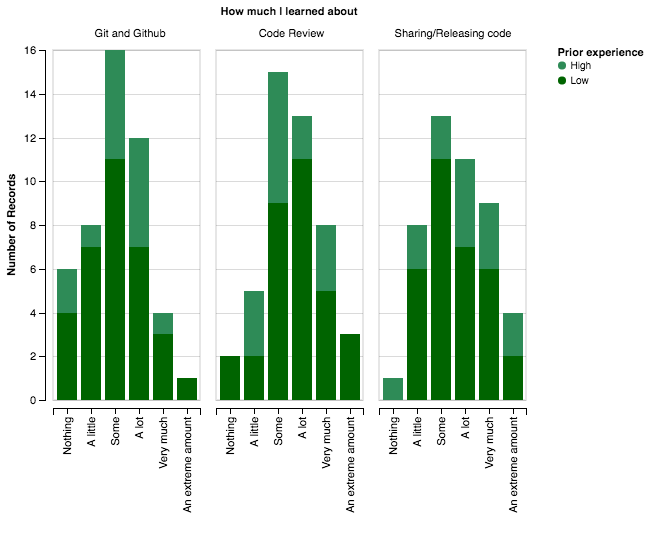

In [15]:
Chart(df_new).mark_bar().encode(
    x=X('response', title =' '),  # X('value', sort=SortField(field='bob', op='values', order='ascending'))
    y='count(*)',
    column='How much I learned about',
    #color='expert:N',
    color=Color('Prior experience:N', scale=Scale(range=['SeaGreen', 'DarkGreen']))
    #opacity='mean(expert)'
    #order='bob'
).transform_data(
    filter=(expr.df.value != 'NaN'),
#    calculate=[Formula('response_order', expr.where(expr.df.value == 'Nothing', '0', 
#                                                    expr.where(expr.df.value == 'A little', '1', 
#                                                               expr.where(expr.df.value == 'Some', '2', 
#                                                                          expr.where(expr.df.value == 'A lot', '3', '4')))))],#
#
#    calculate=[Formula('bad_values', expr.)]
)